In [26]:
import numpy as np
import pandas as pd
from subprocess import check_output
print(check_output(["ls", "./fashion_dataset"]).decode("utf8"))

fashion-mnist_test.csv
fashion-mnist_train.csv
t10k-images-idx3-ubyte
t10k-labels-idx1-ubyte
train-images-idx3-ubyte
train-labels-idx1-ubyte



In [39]:
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

data_train = pd.read_csv("./fashion_dataset/fashion-mnist_train.csv")
data_test = pd.read_csv("./fashion_dataset/fashion-mnist_test.csv")

img_rows , img_cols = 28, 28

X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))
# print(y.shape)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=13)

X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

# print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
# print(X_train.shape)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

X_train /= 255
X_test /= 255
X_val /= 255

print("DONE!!!!")


DONE!!!!


In [40]:
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

batch_size = 256
num_classes = 10 
epochs = 50

img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', kernel_initializer = 'he_normal', input_shape = input_shape))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation = 'softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics = ['accuracy'])
print("Done!!!")

Done!!!


In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 3, 3, 128)         73856     
__________

In [42]:
history = model.fit(X_train, y_train, batch_size = 256, epochs = 50, verbose = 1, validation_data = (X_val, y_val))
score = model.evaluate(X_test, y_test, verbose = 0)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 32s 663us/step - loss: 0.7928 - acc: 0.7057 - val_loss: 0.5042 - val_acc: 0.8160
Epoch 2/50
48000/48000 [==============================] - 31s 647us/step - loss: 0.5114 - acc: 0.8110 - val_loss: 0.3984 - val_acc: 0.8552
Epoch 3/50
48000/48000 [==============================] - 41s 852us/step - loss: 0.4341 - acc: 0.8438 - val_loss: 0.3678 - val_acc: 0.8629
Epoch 4/50
48000/48000 [==============================] - 45s 940us/step - loss: 0.3911 - acc: 0.8568 - val_loss: 0.3398 - val_acc: 0.8746
Epoch 5/50
48000/48000 [==============================] - 58s 1ms/step - loss: 0.3646 - acc: 0.8670 - val_loss: 0.3183 - val_acc: 0.8818
Epoch 6/50
48000/48000 [==============================] - 66s 1ms/step - loss: 0.3415 - acc: 0.8750 - val_loss: 0.2933 - val_acc: 0.8906
Epoch 7/50
48000/48000 [==============================] - 69s 1ms/step - loss: 0.3245 - acc: 0.8812 - val_loss: 0.2862 -

In [43]:
print('Test loss', score[0])
print('Test Accuracy', score[1])

Test loss 0.2117393155321479
Test Accuracy 0.9257


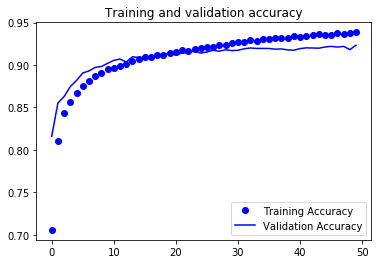

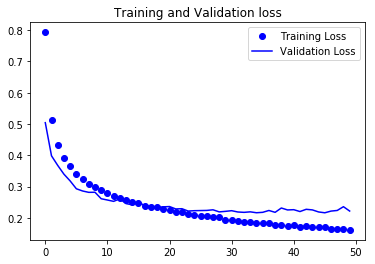

In [45]:
import matplotlib.pyplot as plt
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range (len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation Accuracy')
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [56]:
predicted_classes = model.predict_classes(X_test)
y_true = data_test.iloc[:, 0]
correct = np.nonzero(predicted_classes == y_true)[0]
incorrect = np.nonzero(predicted_classes != y_true)[0]

In [57]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names = target_names))

             precision    recall  f1-score   support

    Class 0       0.88      0.88      0.88      1000
    Class 1       0.99      0.99      0.99      1000
    Class 2       0.88      0.89      0.89      1000
    Class 3       0.94      0.93      0.93      1000
    Class 4       0.89      0.89      0.89      1000
    Class 5       0.99      0.98      0.99      1000
    Class 6       0.78      0.78      0.78      1000
    Class 7       0.96      0.96      0.96      1000
    Class 8       0.98      0.99      0.99      1000
    Class 9       0.95      0.97      0.96      1000

avg / total       0.93      0.93      0.93     10000



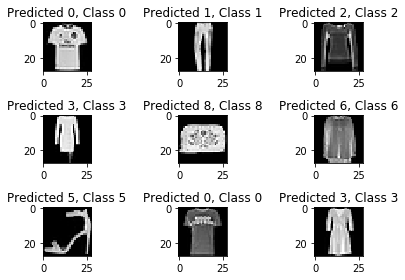

In [58]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28, 28), cmap = 'gray', interpolation = 'none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

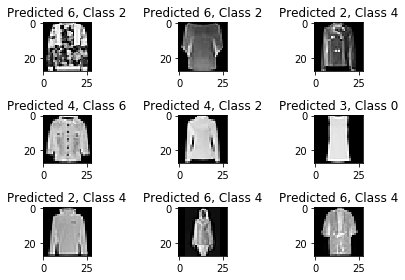

In [59]:
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28, 28), cmap = 'gray', interpolation = 'none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()